# Neural & Behavioral Modeling - Week 3 (Exercises)
by 駱皓正 (austenpsy@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Nonlinear love triangle (5 points)

Please use Euler integration with a small step size (say dt=0.01) and the suggested parameters (a,b,c,d,e,f)=(-3,4,-7,2,2,-1) to simulate Eq.(5) in the following paper:

Sprott, J. C. (2004). Dynamical models of love. Nonlinear dynamics, psychology, and life sciences, 8(3), 303-314.

### 1.1  Coding the simulation (3 points)

Please use differnt colors/shapes to put Rj(t), J, Rg(t), & G(t) curves in the same plot.

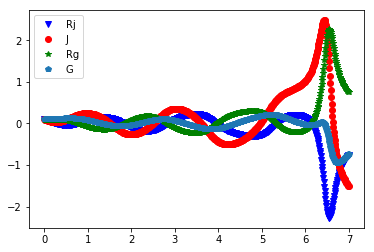

In [2]:
# Write your codes here
a,b,c,d,e,f=-3,4,-7,2,2,-1 # Model parameters
rj,j,rg,g=[0.1],[0.1],[0.1],[0.1] # Initial values
dt=0.01 # step size for numerical integration
t=arange(0,7,dt) # integration period
for i in t[0:-1]:
    rj1,j1,rg1,g1=rj[-1],j[-1],rg[-1],g[-1] # the last element
    rj2=rj1+dt*(a*rj1+b*(j1-g1)*(1-abs(j1-g1)))
    j2=j1+dt*(c*rj1*(1-abs(rj1))+d*j1)
    rg2=rg1+dt*(a*rg1+b*(g1-j1)*(1-abs(g1-j1)))
    g2=g1+dt*(e*rg1*(1-abs(rg1))+f*g1)
    rj.append(rj2)
    j.append(j2)
    rg.append(rg2)
    g.append(g2)
plot(t,rj,'bv');
plot(t,j,'ro');
plot(t,rg,'g*');
plot(t,g,'p');
legend(['Rj','J','Rg','G']);

### 1.2 Studying chaos (2 points)

Please provide two sets of initial values of (Rj, J, Rg, & G) that can produce distinct model behaviors.

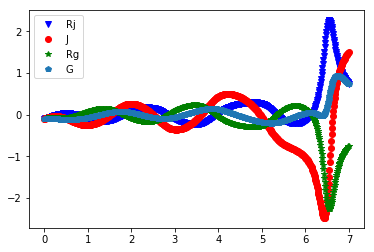

In [3]:
# Run your simulation with the 1st set of initial values here
a,b,c,d,e,f=-3,4,-7,2,2,-1 # Model parameters
rj,j,rg,g=[-.1],[-.1],[-.1],[-.1] # Initial values
dt=0.01 # step size for numerical integration
t=arange(0,7,dt) # integration period
for i in t[0:-1]:
    rj1,j1,rg1,g1=rj[-1],j[-1],rg[-1],g[-1] # the last element
    rj2=rj1+dt*(a*rj1+b*(j1-g1)*(1-abs(j1-g1)))
    j2=j1+dt*(c*rj1*(1-abs(rj1))+d*j1)
    rg2=rg1+dt*(a*rg1+b*(g1-j1)*(1-abs(g1-j1)))
    g2=g1+dt*(e*rg1*(1-abs(rg1))+f*g1)
    rj.append(rj2)
    j.append(j2)
    rg.append(rg2)
    g.append(g2)
plot(t,rj,'bv');
plot(t,j,'ro');
plot(t,rg,'g*');
plot(t,g,'p');
legend(['Rj','J','Rg','G']);

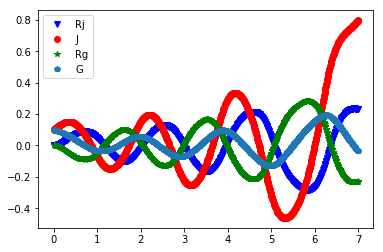

In [4]:
# Run your simulation with the 2nd set of initial values here
a,b,c,d,e,f=-3,4,-7,2,2,-1 # Model parameters
rj,j,rg,g=[0],[0.1],[0],[0.1] # Initial values
dt=0.01 # step size for numerical integration
t=arange(0,7,dt) # integration period
for i in t:
    rj1,j1,rg1,g1=rj[-1],j[-1],rg[-1],g[-1] # the last element
    rj2=rj1+dt*(a*rj1+b*(j1-g1)*(1-abs(j1-g1)))
    j2=j1+dt*(c*rj1*(1-abs(rj1))+d*j1)
    rg2=rg1+dt*(a*rg1+b*(g1-j1)*(1-abs(g1-j1)))
    g2=g1+dt*(e*rg1*(1-abs(rg1))+f*g1)
    rj.append(rj2)
    j.append(j2)
    rg.append(rg2)
    g.append(g2)
plot(t,rj[0:-1],'bv');
plot(t,j[0:-1],'ro');
plot(t,rg[0:-1],'g*');
plot(t,g[0:-1],'p');
legend(['Rj','J','Rg','G']);

## 2 Fix the simulation of "Tragedy of the Commons" (5 points)

Tren's simulation of <a href="https://en.wikipedia.org/wiki/System_archetype#Tragedy_of_the_commons">Tragedy of the Commons</a> ported from STELLA to PYTHON did not reproduce the follow model dynamics:

<img src= http://wiki.mbalib.com/w/images/1/13/%E5%85%B1%E5%90%8C%E7%9A%84%E6%82%B2%E5%89%A7%E6%A8%A1%E6%8B%9F%E7%BB%93%E6%9E%9C.jpg>

Please help Tren to fix his(?) broken simulation:

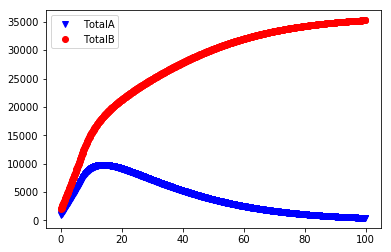

In [5]:
TotalRes=100 # Model parameter
TotalA,TotalB=[1000],[2000] # Initial value
dt=.1 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    TotalA1,TotalB1=TotalA[-1],TotalB[-1] # the last element
    ProjectA=TotalA1/500
    ProjectB=TotalB1/600
    ResPerProject=TotalRes/(ProjectA+ProjectB)
    Risk=0 if ResPerProject >= 3 else (3-ResPerProject)
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*40
    TotalA2=TotalA1+dt*IncomeA # Euler integration
    TotalB2=TotalB1+dt*IncomeB # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
plot(t,TotalA[0:-1],'bv')
plot(t,TotalB[0:-1],'ro')
legend(['TotalA','TotalB']);

Please ignore the physical meanings of those obscure expressions like the definition of Risk:

<center><i>Risk=0 if ResPerProject >= 3 else (3-ResPerProject)</i></center>

Just by looking at Tren's figure, we know that TotalB did not collapse like TotalA when the resource per project (i.e., ResPerProject) became exhausted.

Please check the excitation and inhibiton terms for "TotalA" & "TotalB" and do whatever you can to collapse both variables for small ResPerProject. Note that this is exactly the thinking/experimental process of how a modeller revises his/her model to better fit data.

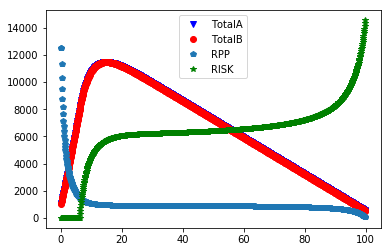

In [6]:
# Write your working simulation here
# after fixation 1
TotalRes=100 # Model parameter
TotalA,TotalB,RPP,RIS=[1000],[1000],[0],[0] # Initial value
dt=.1 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    TotalA1,TotalB1,RPP1,RIS1=TotalA[-1],TotalB[-1],RPP[-1],RIS[-1]# the last element
    ProjectA=TotalA1/500
    ProjectB=TotalB1/500
    ResPerProject=TotalRes/(ProjectA+ProjectB)
    RPP2=ResPerProject*500
    Risk=0 if ResPerProject >= 3 else (3-ResPerProject)
    RIS2=Risk*5000
    IncomeA=ProjectA*20+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*50
    TotalA2=TotalA1+dt*IncomeA # Euler integration
    TotalB2=TotalB1+dt*IncomeB # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
    RPP.append(RPP2)
    RIS.append(RIS2)
    TotalRes-=dt
RPP[0]=RPP[1]
RIS[0]=RIS[1]
plot(t,TotalA[0:-1],'bv')
plot(t,TotalB[0:-1],'ro')
plot(t,RPP[0:-1],'p')
plot(t,RIS[0:-1],'g*')
legend(['TotalA','TotalB','RPP','RISK']);

In the simulation above, I noticed that the total resource will be never exhausted by time, and I fixed this part, cause in the real situation of TOC the total resource may exhausted by time which is due to the rate of  usage of resource is larger than the rate of growing of resource.

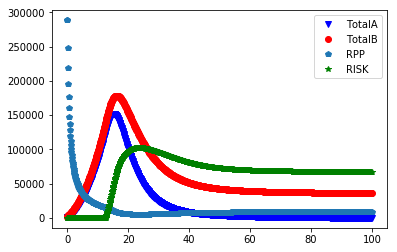

In [15]:
# Write your working simulation here
# after fixation 2
TotalRes=100 # Model parameter
TotalA,TotalB,RPP,RIS=[1000],[2000],[0],[0] # Initial value
dt=.1 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    TotalA1,TotalB1,RPP1,RIS1=TotalA[-1],TotalB[-1],RPP[-1],RIS[-1]# the last element
    ProjectA=TotalA1/500
    ProjectB=TotalB1/600
    ResPerProject=TotalRes/(-ProjectA*.8+ProjectB)
    RPP2=ResPerProject*5000
    Risk=0 if ResPerProject >= 3 else (3-ResPerProject)
    RIS2=Risk*50000
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*40
    TotalA2=TotalA1+dt*IncomeA # Euler integration
    TotalB2=TotalB1+dt*IncomeB # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
    RPP.append(RPP2)
    RIS.append(RIS2)
RPP[0]=RPP[1]
RIS[0]=RIS[1]
plot(t,TotalA[0:-1],'bv')
plot(t,TotalB[0:-1],'ro')
plot(t,RPP[0:-1],'p')
plot(t,RIS[0:-1],'g*')
legend(['TotalA','TotalB','RPP','RISK']);